# PAINS
## pan-assay interference substances

during actual activity screening, there are some structural patterns that hit frequently and might seem promising at the first glance. They do, however, have other issues that render them useless for pharma application. Sadly, this is ofthen found after some time & money investment. PAINS is a list of common time-waster patterns, and it is advisable to remove them from your virtual library. Better formulations at:
https://www.nature.com/news/chemistry-chemical-con-artists-foil-drug-discovery-1.15991

![](img/pains.jpg)

![](img/pains2.jpg)

Let's see how many drugbank compounds would have gone down the drain if the PAINS filters were applied:

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

In [3]:
with open('../data/PAINS/p_l15.txt') as p:
    pains_l15 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [4]:
with open('../data/PAINS/p_l150.txt') as p:
    pains_l150 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [5]:
with open('../data/PAINS/p_l150.txt') as p:
    pains_m150 = [(Chem.MolFromSmarts(smarts), comment.lstrip('<regId="').split('(')[0]) for smarts, comment in (line.split() for line in p)]

In [6]:
len(pains_l15), len(pains_l150), len(pains_m150)

(409, 55, 55)

In [9]:
pains_all = pains_l15 + pains_l150 + pains_m150

In [10]:
drugbank_pains_all = [tuple((m.HasSubstructMatch(pain) for pain, comment in pains_all)) for m in drugbank]

In [29]:
len(drugbank_pains_l15), drugbank_pains_l15[0]

(7110,
 (False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  F

In [31]:
drugbank_pains_l150 = [tuple((m.HasSubstructMatch(pain) for pain, comment in pains_l150)) for m in drugbank]

In [32]:
drugbank_pains_m150 = [tuple((m.HasSubstructMatch(pain) for pain, comment in pains_m150)) for m in drugbank]

What DrugBank entries match some PAINS?

In [12]:
painsfails_all = [i for i, patterns in enumerate(drugbank_pains_all) if any(patterns)]
len(drugbank_pains_all), len(painsfails_all)

(7110, 34)

So, 16 compounds from DrugBank match at least one PAINS pattern from the largest l15 PAINS set. Which ones?

In [41]:
painsfails_mols = [drugbank[i] for i in painsfails_l15]
painsfails_hits = [[pains_l15[j][1] for j, match in enumerate(drugbank_pains_l15[i]) if match] for i in painsfails_l15]
painsfails_hits

[['styrene_A'],
 ['styrene_A'],
 ['keto_keto_beta_B'],
 ['keto_keto_beta_B'],
 ['styrene_B'],
 ['steroid_A'],
 ['styrene_B'],
 ['acyl_het_A'],
 ['acyl_het_A'],
 ['keto_keto_beta_B'],
 ['quinone_D'],
 ['quinone_D'],
 ['keto_keto_beta_B'],
 ['keto_phenone_A'],
 ['keto_keto_beta_B'],
 ['quinone_D']]

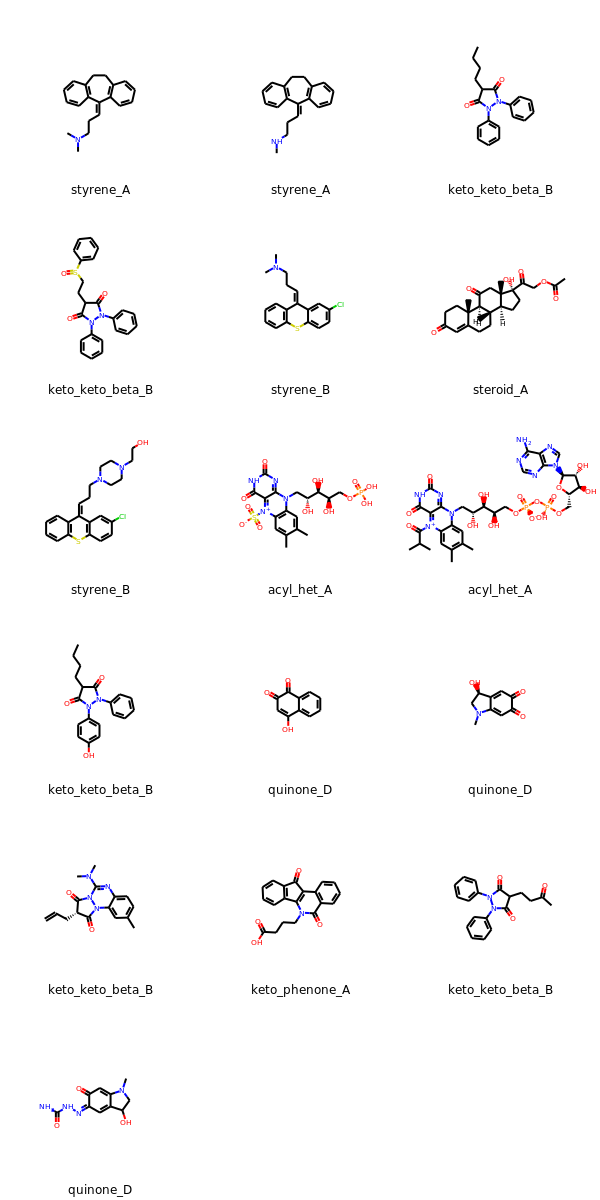

In [43]:
Draw.MolsToGridImage(painsfails_mols,
                     legends=[", ".join(fails) for fails in painsfails_hits])